<a href="https://colab.research.google.com/github/Felizlin94/ml-titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作 #01:鐵達尼號存活預測

                   Feature  Importance
1                      Age    0.236567
2                     Fare    0.233276
5                 Sex_male    0.146723
4               Sex_female    0.131907
0                   Pclass    0.074162
3              Family_Size    0.071226
17  Cabin_Category_Unknown    0.034259
6               Embarked_C    0.014225
8               Embarked_S    0.013769
13        Cabin_Category_E    0.009140
7               Embarked_Q    0.007468
11        Cabin_Category_C    0.007210
10        Cabin_Category_B    0.006405
12        Cabin_Category_D    0.005498
14        Cabin_Category_F    0.003069
9         Cabin_Category_A    0.003003
15        Cabin_Category_G    0.001751
16        Cabin_Category_T    0.000342


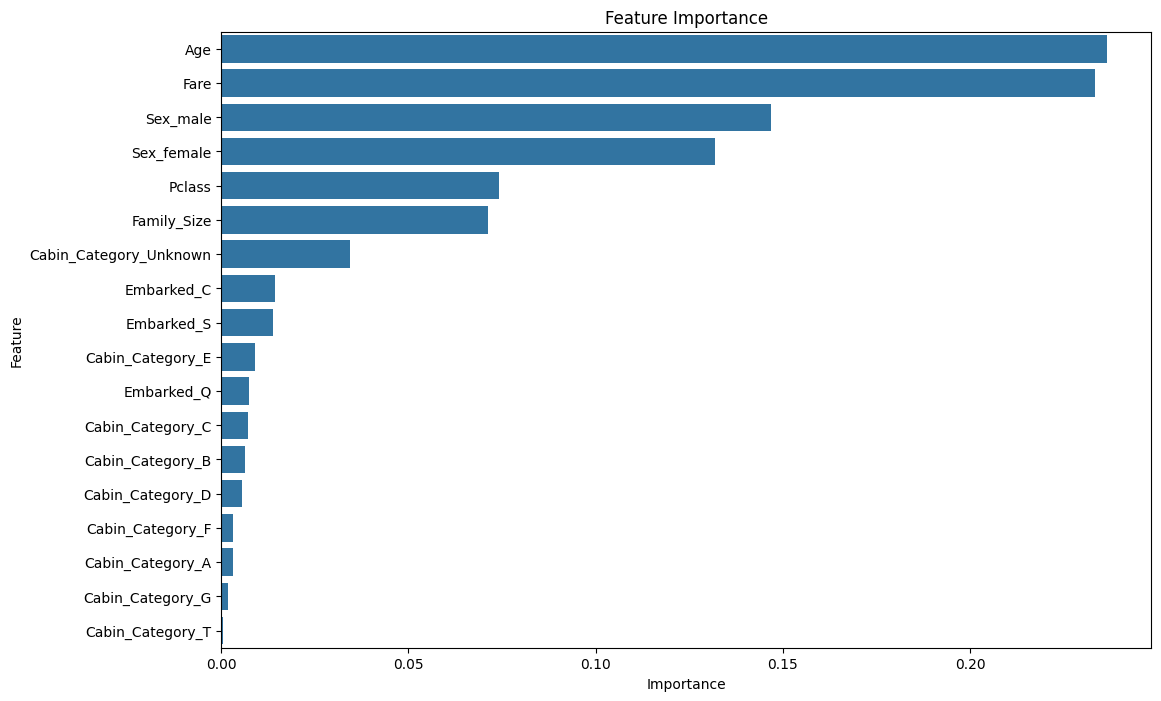

Training Accuracy: 0.98
Test Accuracy: 0.79


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the `train.csv` dataset of the Titanic dataset
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)

# Definition of each column in Titanic data:
# (https://www.kaggle.com/competitions/titanic/data)


### 1. Data Exploration

# Check information of rows and columns
# display(HTML("<h3>Info df:</h3>"))
# print(df.info())

# Look for missing values in the dataset
missing_values = df.isnull().sum()
# display(HTML("<h3>Missing values:</h3>"))
# print(missing_values)

# Check the distribution of categorical variables
# display(HTML("<h3>The distribution of categorical variables:</h3>"))
# categorical_columns = df.select_dtypes(include=['object']).columns
# for column in categorical_columns:
#     print("\n", column, ":\n", df[column].value_counts())

# Statistical summary of numerical columns
# display(HTML("<h3>Statistical Summary of numerical columns:</h3>"))
# print(df.describe())


### 2. Feature Processing

# Clip the first English character of the Cabin value as a new categorical feature
df['Cabin_Category'] = df['Cabin'].str[0]
cabin_counts = df['Cabin_Category'].value_counts()
# display(HTML("<h3>Cabin Categories Summary:</h3>"))
# print(cabin_counts)
# print("Total number of Cabin_Category non-null values:", cabin_counts.sum())

# Create Family-Size as a new numerical feature
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
# display(HTML("<h3>Family Size Summary:</h3>"))
# print(df['Family_Size'].describe())

# Drop 'PassengerId', 'Cabin' , 'SibSp' and 'Parch' columns
df.drop(['PassengerId', 'Cabin', 'SibSp', 'Parch'], axis=1, inplace=True)


### 3. Visualization

# Map the Survived column to more descriptive labels
df['Survived_Label'] = df['Survived'].map({0: 'Not Survived', 1: 'Survived'})

# Visualize the relationship between categorical columns and Survived
categorical_columns = ['Pclass', 'Sex', 'Embarked', 'Cabin_Category']
# for column in categorical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(x=column, hue='Survived_Label', data=df)
#     plt.title(f'Survival Count by {column}')
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.legend(title='Survived')
#     plt.show()

# Visualize the relationship between numerical columns and Survived
numerical_columns = ['Age', 'Fare', 'Family_Size']
# for column in numerical_columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='Survived_Label', y=column, data=df, hue='Survived_Label', palette=['#FF9999', '#66B2FF'], legend=False)
#     plt.title(f'{column} Distribution by Survival')
#     plt.xlabel('Survived')
#     plt.ylabel(column)
#     plt.show()


### 4. Imputation Strategies for Missing Data

# Check if there are missing values in the data
# display(HTML("<h3>Missing values from the data:</h3>"))
# print(df.isnull().sum())

# Impute missing values for 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Impute missing values for 'Embarked' with the most common embarkation point
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Impute missing values for 'Cabin_Category' with a new category 'Unknown'
df['Cabin_Category'].fillna('Unknown', inplace=True)

# Check if there are any remaining missing values
missing_values_after_imputation = df.isnull().sum()
# display(HTML("<h3>Missing values after imputation:</h3>"))
# print(missing_values_after_imputation)


### 5. Correlation Analysis

# Drop non-numeric and irrelevant columns
df.drop(['Name', 'Ticket', 'Survived_Label'], axis=1, inplace=True)

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'Cabin_Category'],  dtype=int)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
# display(HTML("<h3>Correlation Matrix:</h3>"))
# print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
# plt.title('Correlation Matrix of Titanic Dataset')
# plt.show()

# Check correlation with target variable 'Survived'
correlation_with_survived = correlation_matrix['Survived'].sort_values(ascending=False)
# display(HTML("<h3>Correlation with Survived:</h3>"))
# print(correlation_with_survived)


### 6. Feature Importance

# Prepare the data for modeling (excluding 'Survived')
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_clf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
display(HTML("<h3>Feature Importances:</h3>"))
print(importance_df)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

# Evaluate the model
train_accuracy = rf_clf.score(X_train, y_train)
test_accuracy = rf_clf.score(X_test, y_test)
display(HTML("<h3>Model Performance:</h3>"))
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
